<a href="https://colab.research.google.com/github/Nimisha-30/ArtificialIntelligence/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uninformed/Blind Search Algorithms

In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import igraph as ig
import matplotlib.pyplot as plt

##Function to display graph

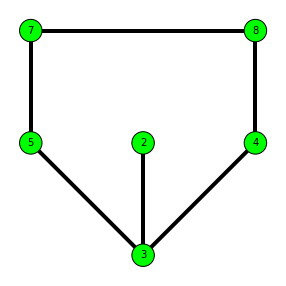

In [ ]:
graph={0:[1,2],1:[3,4],2:[5],3:[],4:[5],5:[]}
v=6
edge_list=[[0,1],[0,2],[1,3],[1,4],[2,5],[4,5]]
g=ig.Graph(n=v, edges=edge_list)
g.vs["name"]=[5,3,7,2,4,8]
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(g,target=ax,layout="tree",vertex_size=0.2,vertex_color="green",vertex_label=g.vs["name"],vertex_label_size=10,edge_width=4,edge_color="black")
plt.show()

In [ ]:
def displayGraph(v, list1):
  g=ig.Graph(n=v, edges=list1)
  #g.vs["name"]=[5,3,7,2,4,8]
  #g.vs['name']=[i for i in range(v)]
  g.vs['name']=['A', 'B', 'C', 'D', 'E', 'G', 'F']
  fig,ax=plt.subplots(figsize=(10,10))
  ig.plot(g,target=ax,layout='tree',vertex_size=0.1,vertex_color='purple',vertex_label=g.vs['name'],vertex_label_size=10,edge_width=2,edge_color='black')
  plt.show()

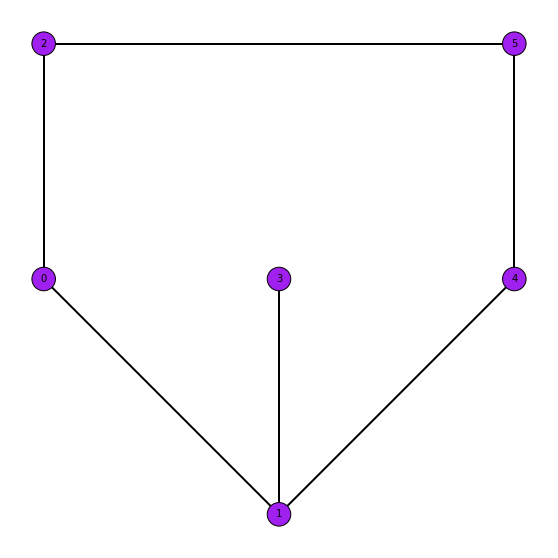

In [ ]:
# uncomment "g.vs['name']=[i for i in range(v)]" in displayGraph function 
displayGraph(v, edge_list)

##Breadth First Search

0 1 2 3 4 5 
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]


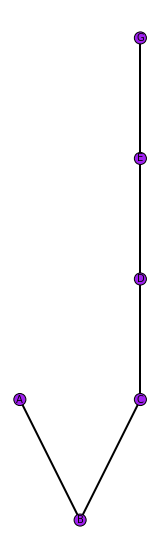

In [ ]:
# uncomment "g.vs["name"]=[5,3,7,2,4,8]" in displayGraph function"
visited=[]
queue=[]
def BFS(visited, graph, node):
  visited.append(node)
  queue.append(node)
  while(queue):
    m=queue.pop(0)
    print(m, end=" ")
    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
  list2=[]
  for i in range(len(visited)-1):
    list1=[]
    list1.append(int(visited[i]))
    list1.append(int(visited[i+1]))
    list2.append(list1)
  print()
  print(list2)
  displayGraph(6,list2)
BFS(visited, graph, 0)

In [ ]:
# a-0, b-1, c-2, d-3, e-4, g-5, f-6
graph={0: [1, 2],1: [3,4],2: [5],3: [],4: [6],5: [],6: []}
edgelist=[[0, 1], [0, 2], [1, 3], [1, 4], [2, 5], [4, 6]]
displayGraph(7, edgelist)

Visited: 0
0 is not a destination node.
1 is not a destination node.
2 is not a destination node.
3 is not a destination node.
4 is not a destination node.
5 is not a destination node.
Destination node found: 6
Path is available.
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]


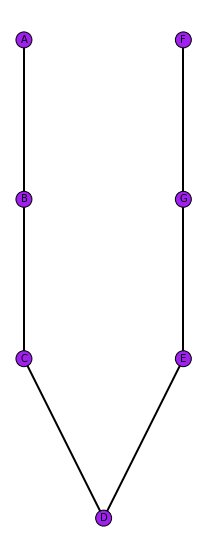

In [ ]:
def BFS(graph, start, dest):
    queue=list()
    visited=list()
    queue.append(start)
    print('Visited:', start)
    result=["Path unavailable.", list()]
    while queue:
        node=queue.pop(0)
        visited.append(node)
        if node==dest:
            print('Destination node found:', node)
            result[0] = 'Path is available.'
            break
        print(node, 'is not a destination node.')
        for child in graph[node]:
            if child not in visited:
                queue.append(child)
    result[1]=visited 
    return result
result=BFS(graph, 0, 6)
print(result[0])
result.remove(result[0])
result=result[0]
finalpath2=[]
for i in range(len(result)-1):
  list1=[]
  list1.append(result[i])
  list1.append(result[i+1])
  finalpath2.append(list1)
print(finalpath2)
displayGraph(7, finalpath2)

##Depth First Search

Visited: 0
0 is not a destination node.
2 is not a destination node.
Destination node found: 5
Path is available.
[[0, 1], [1, 2], [2, 5]]


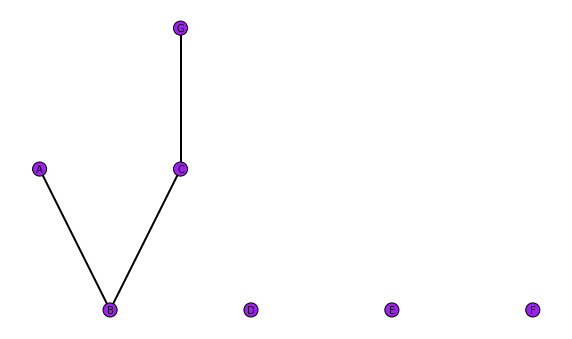

In [ ]:
def DFS(graph, start, dest):
    stack=list()
    visited=list()
    stack.append(start)
    visited.append(start)
    print('Visited:', start)
    result = ['Path unavailable.', list()]
    while stack:
        node = stack.pop() 
        if node==dest:
            print('Destination node found:', node)
            result[0] = 'Path is available.'
            break
        print(node,'is not a destination node.')
        for child in graph[node]:
            if child not in visited:
                visited.append(child)
                stack.append(child)
    result[1]=visited 
    return result
result=DFS(graph, 0, 5)
print(result[0])
result.remove(result[0])
result=result[0]
finalpath2=[]
for i in range(len(result)-1):
  list1=[]
  list1.append(result[i])
  list1.append(result[i+1])
  finalpath2.append(list1)
print(finalpath2)
displayGraph(7, finalpath2)

##Depth Limited Search

Current level: 0
Goal node testing for: 0
Goal node test failed.
Expanding current node: 0
Current level: 1
Goal node testing for: 1
Goal node test failed.
Expanding current node: 1
Current level: 2
Goal node testing for: 3
Goal node test successful.
Path to goal node available.
[0, 1, 3]
[[0, 1], [1, 3]]


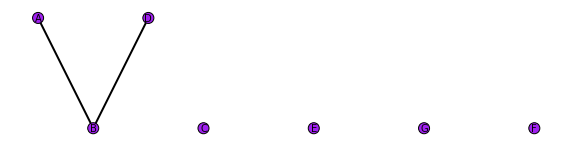

In [ ]:
def DLS(start, goal, path, level, maxDepth):
  print("Current level:", level)
  print("Goal node testing for:", start)
  path.append(start)
  if start==goal:
    print("Goal node test successful.")
    return path
  print("Goal node test failed.")
  if level==maxDepth:
    return False
  print("Expanding current node:", start)
  for child in graph[start]:
    if DLS(child, goal, path, level+1, maxDepth):
      return path
    path.pop()
  return False
path=list()
result=DLS(0, 3, path, 0, 3)
if result:
  print("Path to goal node available.")
  print(path)
  finalpath2=[]
  for i in range(len(path)-1):
    list1=[]
    list1.append(path[i])
    list1.append(path[i+1])
    finalpath2.append(list1)
  print(finalpath2)
  displayGraph(7, finalpath2)
else:
  print("Path to goal node unavailable in given depth limit.")

##Iterative deepening search

Checking for destination:  0
Checking for destination:  0
Checking for destination:  1
Checking for destination:  2
Checking for destination:  0
Checking for destination:  1
Checking for destination:  3
Checking for destination:  4
Checking for destination:  2
Checking for destination:  5
Path is available.
[[0, 2], [2, 5]]


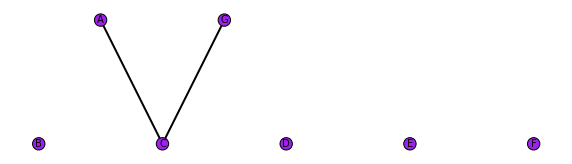

In [ ]:
path=list()
def DFS(currentNode, dest, graph, maxDepth, curList):
  print("Checking for destination: ", currentNode)
  curList.append(currentNode)
  if currentNode==dest:
    return True
  if maxDepth<=0:
    path.append(curList)
    return False
  for node in graph[currentNode]:
    if DFS(node, dest, graph, maxDepth-1, curList):
      return True
    else:
      curList.pop()
  return False
def iterativeDeepeningDFS(currentNode, dest, graph, maxDepth):
  for i in range(maxDepth):
    curList=list()
    if DFS(currentNode, dest, graph, i, curList):
      return True
  return False
if iterativeDeepeningDFS(0, 5, graph, 4):
  print("Path is available.")
  finalpath=path.pop()
  finalpath2=[]
  for i in range(len(finalpath)-1):
    list1=[]
    list1.append(finalpath[i])
    list1.append(finalpath[i+1])
    finalpath2.append(list1)
  print(finalpath2)
  displayGraph(7, finalpath2)
else:
  print("Path is not available.")